Valores nulos:
 id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_0        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64


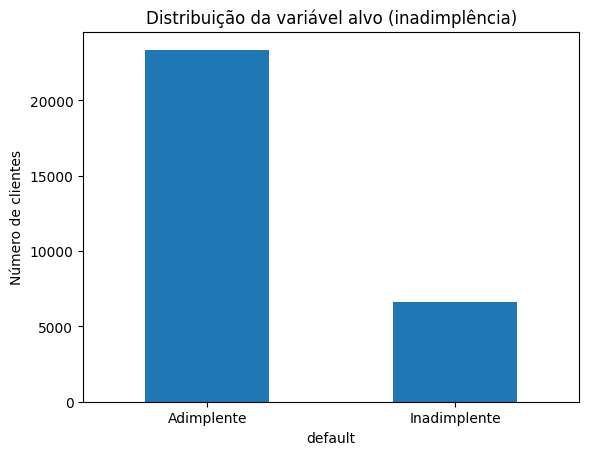

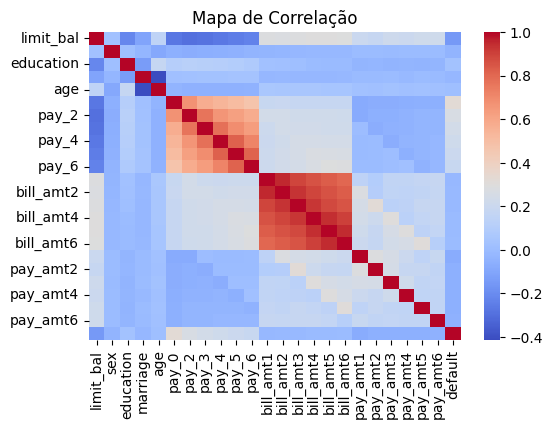


--- Regressão Logística ---
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Matriz de Confusão:
 [[6805  204]
 [1521  470]]
AUC-ROC: 0.7150

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.79      0.81      0.79      9000

Matriz de Confusão:
 [[6591  418]
 [1258  733]]
AUC-ROC: 0.7599


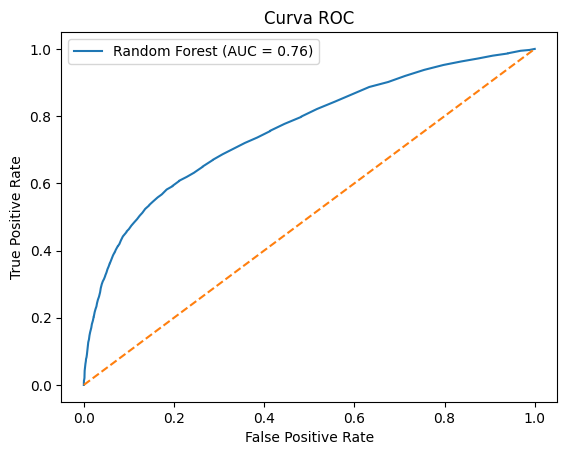

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Leitura do arquivo
df = pd.read_csv("default of credit card clients.csv", header=1)

# Normalizando os nomes das colunas: minúsculo, sem espaços
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Renomeando a coluna alvo para facilitar o uso
df.rename(columns={"default_payment_next_month": "default"}, inplace=True)

# Verificando valores nulos
print("Valores nulos:\n", df.isnull().sum())

# Visualizando a distribuição da variável alvo
df["default"].value_counts().plot(kind="bar")
plt.title("Distribuição da variável alvo (inadimplência)")
plt.xticks([0, 1], ["Adimplente", "Inadimplente"], rotation=0)
plt.ylabel("Número de clientes")
plt.show()

# Removendo a coluna ID
df.drop("id", axis=1, inplace=True)

# Correlação entre variáveis
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Mapa de Correlação")
plt.show()

# Separando features e target
X = df.drop("default", axis=1)
y = df["default"]

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Modelos
models = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Treinamento e avaliação
for nome, modelo in models.items():
    print(f"\n--- {nome} ---")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    y_proba = modelo.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC-ROC: {auc:.4f}")

# Curva ROC para o melhor modelo (Random Forest)
rf_model = models["Random Forest"]
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_rf_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_rf_proba):.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()
